<a href="https://colab.research.google.com/github/mequanent/App-Recommendation-Exercises/blob/main/HW_on_Chapter%201%20-%20Mining%20Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mining Twitter

Twitter implements OAuth 1.0A as its standard authentication mechanism, and in order to use it to make requests to Twitter's API, you'll need to go to https://developer.twitter.com/en/apps and create a sample application. It is possible that Twitter no longer supports sandboxed applications and you may need to submit a request for permission to develop an app on Twitter.

There are four primary identifiers you'll need to note for an OAuth 1.0A workflow: consumer key, consumer secret, access token, and access token secret. Note that you will need an ordinary Twitter account in order to login, create an app, and get these credentials.

<img src="https://github.com/mequanent/App-Recommendation-Exercises/blob/main/resources/ch01-twitter/images/Twitter-AppCredentials.png?raw=1" width="600px">

If you are running this code on Binder or from the Docker container, you should just be able to execute the code in this notebook without any worries whatsoever about installing dependencies. If you are running the code from your own development envioronment, however, be advised that these examples in this chapter take advantage of a Python package called [twitter](https://github.com/sixohsix/twitter) to make API calls. You can install this package in a terminal with [pip](https://pypi.python.org/pypi/pip) with the command `pip install twitter`, preferably from within a [Python virtual environment](https://pypi.python.org/pypi/virtualenv). 

Once installed, you should be able to open up a Python interpreter (or better yet, your [IPython](http://ipython.org/) interpreter) and get rolling.

## Authorizing an application to access Twitter account data

In [1]:
pip install twitter -q

     |████████████████████████████████| 50 kB 3.0 MB/s 


In [2]:
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

In [ ]:
a = twitter_api.trends.available()
a

In [ ]:
WORLD_WOE_ID = 1
ET_WOE_ID = 23424808

## Retrieving trends

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [11]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977
#ET_WOE_ID = 23424808
AF_WOE_ID = 23424942

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=AF_WOE_ID)

print(world_trends)
print()
print(us_trends)

[{'trends': [{'name': '#SVT_DropItLikeHOT', 'url': 'http://twitter.com/search?q=%23SVT_DropItLikeHOT', 'promoted_content': None, 'query': '%23SVT_DropItLikeHOT', 'tweet_volume': 203003}, {'name': '#SVT_HOT', 'url': 'http://twitter.com/search?q=%23SVT_HOT', 'promoted_content': None, 'query': '%23SVT_HOT', 'tweet_volume': 386112}, {'name': 'Warriors', 'url': 'http://twitter.com/search?q=Warriors', 'promoted_content': None, 'query': 'Warriors', 'tweet_volume': 366990}, {'name': 'SEVENTEEN HOT MV RELEASE', 'url': 'http://twitter.com/search?q=%22SEVENTEEN+HOT+MV+RELEASE%22', 'promoted_content': None, 'query': '%22SEVENTEEN+HOT+MV+RELEASE%22', 'tweet_volume': 184173}, {'name': '#거짓말없어_세븐틴은_HOT', 'url': 'http://twitter.com/search?q=%23%EA%B1%B0%EC%A7%93%EB%A7%90%EC%97%86%EC%96%B4_%EC%84%B8%EB%B8%90%ED%8B%B4%EC%9D%80_HOT', 'promoted_content': None, 'query': '%23%EA%B1%B0%EC%A7%93%EB%A7%90%EC%97%86%EC%96%B4_%EC%84%B8%EB%B8%90%ED%8B%B4%EC%9D%80_HOT', 'tweet_volume': 136712}, {'name': 'Klay', 'ur

In [ ]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

In [ ]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

In [15]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Billionaires', 'Steph', 'Klay', 'Warriors', '#DubNation'}


## Anatomy of a Tweet

In [47]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

#q = '#MothersDay' 
q = '#AmharaGenocide' 

count = 10000

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 499
{
 "created_at": "Fri May 27 08:04:14 +0000 2022",
 "id": 1530097534252859392,
 "id_str": "1530097534252859392",
 "text": "RT @sisaywm: PM @AbiyAhmedAli's admin has arrested over 5000 #Amharas with pretext of \u201cLaw &amp; order\u201d operation.  Targets of this targeted pr\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "Amharas",
    "indices": [
     61,
     69
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "sisaywm",
    "name": "Sisay M",
    "id": 2290519909,
    "id_str": "2290519909",
    "indices": [
     3,
     11
    ]
   },
   {
    "screen_name": "AbiyAhmedAli",
    "name": "Abiy Ahmed Ali \ud83c\uddea\ud83c\uddf9",
    "id": 1168167671151628290,
    "id_str": "1168167671151628290",
    "indices": [
     16,
     29
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "re

In [48]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favorites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @sisaywm: PM @AbiyAhmedAli's admin has arrested over 5000 #Amharas with pretext of “Law &amp; order” operation.  Targets of this targeted pr…
Favorites:  0
Retweets:  37

RT @Etiozion: The 🇪🇹 gov't has abducted 11 journalists since May 19 as part of a broader crackdown that the government calls a “law enforce…
Favorites:  0
Retweets:  67

RT @Ebrahim53277131: The Ethiopian government doing as #terrorist by killing children and innocent people of Amhara in their home country !…
Favorites:  0
Retweets:  4

RT @sisaywm: PM @AbiyAhmedAli's admin has arrested over 5000 #Amharas with pretext of “Law &amp; order” operation.  Targets of this targeted pr…
Favorites:  0
Retweets:  37

RT @sisaywm: Few prominent #Amhara Journalists, activists, politicians, community &amp; military leaders were profiled &amp; kidnapped by @AbiyAhme…
Favorites:  0
Retweets:  123

RT @sisaywm: More than 4,500 people arrested as part of a wider crackdown against local heroes, Fanos, Gov't critics &amp; z press. 


## Extracting text, screen names, and hashtags from tweets

In [49]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1) )
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @sisaywm: PM @AbiyAhmedAli's admin has arrested over 5000 #Amharas with pretext of \u201cLaw &amp; order\u201d operation.  Targets of this targeted pr\u2026",
 "RT @Etiozion: The \ud83c\uddea\ud83c\uddf9 gov't has abducted 11 journalists since May 19 as part of a broader crackdown that the government calls a \u201claw enforce\u2026",
 "RT @Ebrahim53277131: The Ethiopian government doing as #terrorist by killing children and innocent people of Amhara in their home country !\u2026",
 "RT @sisaywm: PM @AbiyAhmedAli's admin has arrested over 5000 #Amharas with pretext of \u201cLaw &amp; order\u201d operation.  Targets of this targeted pr\u2026",
 "RT @sisaywm: Few prominent #Amhara Journalists, activists, politicians, community &amp; military leaders were profiled &amp; kidnapped by @AbiyAhme\u2026"
]
[
 "sisaywm",
 "AbiyAhmedAli",
 "Etiozion",
 "Ebrahim53277131",
 "sisaywm"
]
[
 "Amharas",
 "terrorist",
 "Amharas",
 "Amhara",
 "AmharaUnderAttack"
]
[
 "RT",
 "@sisaywm:",
 "PM",
 "@

## Creating a basic frequency distribution from the words in tweets

In [50]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 466), ('of', 410), ('a', 265), ('&amp;', 227), ('has', 191), ('the', 183), ('#AmharaGenocide', 180), ('#AmharaUnderAttack', 146), ('The', 114), ('arrested', 111)]

[('AbiyAhmedAli', 144), ('sisaywm', 74), ('Etiozion', 74), ('Alex_G_AGA', 47), ('POTUS', 20), ('UniqueMoveon', 20), ('antonioguterres', 19), ('YayehElyas', 19), ('mbachelet', 15), ('eucopresident', 15)]

[('AmharaGenocide', 184), ('AmharaUnderAttack', 148), ('Amharas', 105), ('Amhara', 97), ('AmharaMassArrests', 58), ('AmharaResistance', 17), ('Ethiopia', 16), ('IamFano', 12), ('Amharastudents', 12), ('Amharawomen', 12)]



## Using prettytable to display tuples in a nice tabular format

In [51]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+--------------------+-------+
| Word               | Count |
+--------------------+-------+
| RT                 |   466 |
| of                 |   410 |
| a                  |   265 |
| &amp;              |   227 |
| has                |   191 |
| the                |   183 |
| #AmharaGenocide    |   180 |
| #AmharaUnderAttack |   146 |
| The                |   114 |
| arrested           |   111 |
+--------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| AbiyAhmedAli    |   144 |
| sisaywm         |    74 |
| Etiozion        |    74 |
| Alex_G_AGA      |    47 |
| POTUS           |    20 |
| UniqueMoveon    |    20 |
| antonioguterres |    19 |
| YayehElyas      |    19 |
| mbachelet       |    15 |
| eucopresident   |    15 |
+-----------------+-------+
+-------------------+-------+
| Hashtag           | Count |
+-------------------+-------+
| AmharaGenocide    |   184 |
| AmharaUnderAttack |   148 |
| Amharas           |   

## Calculating lexical diversity for tweets

In [52]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.11013256697877075
0.15878378378378377
0.06341463414634146
18.008347245409016


## Finding the most popular retweets

In [79]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
#[pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
st = set(sorted(retweets, reverse=True)) # Helps to get unique elements
lst = list(st) # change back the set to a list to sort easily 
[pt.add_row(row) for row in sorted(lst, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+---------------+---------------------+----------------------------------------------------+
| Count | Screen Name   | Tweet ID            | Text                                               |
+-------+---------------+---------------------+----------------------------------------------------+
| 143   | sadorAmhara   | 1529095505435062272 | RT @sadorAmhara: ከሆድ ውስጥ አውጥቶ ህፃን የሚገድል መንግስት      |
|       |               |                     | የተወለደውን ቢያግት ምን ይገርማል !!                           |
|       |               |                     | #AmharaGenocide                                    |
|       |               |                     | #AmharaGenocide                                    |
|       |               |                     | #AmharaUnderAttack https://t.co/zD…                |
| 123   | sisaywm       | 1529219382575935488 | RT @sisaywm: Few prominent #Amhara Journalists,    |
|       |               |                     | activists, politicians, community &amp; mil

In [78]:
# Old Version of popular tweets displaying
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['retweeted_status']['id'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if 'retweeted_status' in status.keys()
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Tweet ID', 'Text'])
[pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-------------+---------------------+----------------------------------------------------+
| Count | Screen Name | Tweet ID            | Text                                               |
+-------+-------------+---------------------+----------------------------------------------------+
| 143   | sadorAmhara | 1529095505435062272 | RT @sadorAmhara: ከሆድ ውስጥ አውጥቶ ህፃን የሚገድል መንግስት      |
|       |             |                     | የተወለደውን ቢያግት ምን ይገርማል !!                           |
|       |             |                     | #AmharaGenocide                                    |
|       |             |                     | #AmharaGenocide                                    |
|       |             |                     | #AmharaUnderAttack https://t.co/zD…                |
| 143   | sadorAmhara | 1529095505435062272 | RT @sadorAmhara: ከሆድ ውስጥ አውጥቶ ህፃን የሚገድል መንግስት      |
|       |             |                     | የተወለደውን ቢያግት ምን ይገርማል !!                           |
|       | 

## Looking up users who have retweeted a status

In [80]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here

#_retweets = twitter_api.statuses.retweets(id=862359093398261760)
_retweets = twitter_api.statuses.retweets(id=1529095505435062272)
print([r['user']['screen_name'] for r in _retweets])

['tube22488741', 'ZamzamZ11089518', 'fasiledes3', 'EndewaT', 'anduamelak1', '2021Dagim', 'WOHA66996853', 'meseret_messi', 'MesTamirat16', 'Zufan53131086', 'fikremariambel4', 'Hiwot19Hiwot', 'Kidusgeorgis', 'abiey9', 'DemekeAwoke', 'KassahunAsrat', 'Sara94051780', 'AbiyDemilew', 'hollymanzion']


## Plotting frequencies of words

Text(0.5, 0, 'Word Rank')

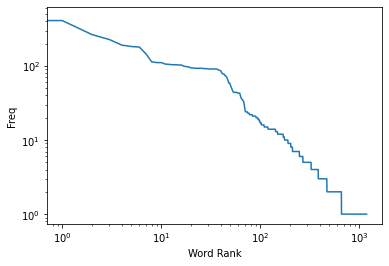

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Generating histograms of words, screen names, and hashtags

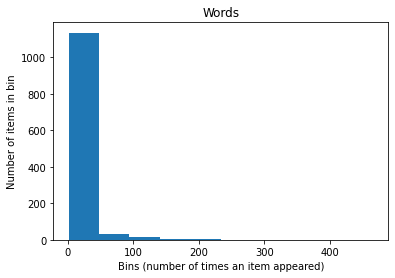

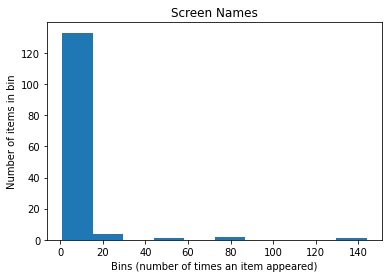

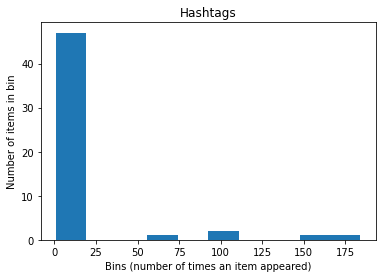

<Figure size 432x288 with 0 Axes>

In [82]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

## Generating a histogram of retweet counts

Text(0, 0.5, 'Number of tweets in bin')

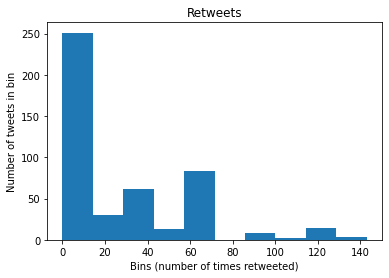

In [83]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _, _ in retweets]

plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

## Sentiment Analysis

In [ ]:
pip install twython -q

In [ ]:
# pip install nltk
# pip install twython
import nltk
nltk.download('vader_lexicon')

import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
twitter_stream = twitter.TwitterStream(auth=auth)
iterator = twitter_stream.statuses.sample()

In [ ]:
tweets = []
for tweet in iterator:
    try:
        if tweet['lang'] == 'en':
            tweets.append(tweet)
    except:
        pass
    if len(tweets) == 100:
        break

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
analyzer.polarity_scores('Hello')

In [ ]:
analyzer.polarity_scores('I really enjoy this video series.')

In [ ]:
analyzer.polarity_scores('I REALLY enjoy this video series.')

In [ ]:
analyzer.polarity_scores('I REALLY enjoy this video series!!!')

In [ ]:
analyzer.polarity_scores('I REALLY did not enjoy this video series!!!')

In [ ]:
scores = np.zeros(len(tweets))

for i, t in enumerate(tweets):
    # Extract the text portion of the tweet
    text = t['text']
    
    # Measure the polarity of the tweet
    polarity = analyzer.polarity_scores(text)
    
    # Store the normalized, weighted composite score
    scores[i] = polarity['compound']

In [ ]:
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

In [ ]:
print('{0:6.3f} : "{1}"'.format(scores[most_positive], tweets[most_positive]['text']))

In [ ]:
print('{0:6.3f} : "{1}"'.format(scores[most_negative], tweets[most_negative]['text']))